***Context***

Advertising is a type of marketing communication used to promote or sell products or services. Advertising is usually paid by sponsors and viewed through various media such as websites, apps, emails and other offline communications. Android is the mobile operating system running on Google OS with about 69% of the market share worldwide. The Google Play Store is the Android app store used to install Android Apps.

Zoom Ads is an advertising agency that wants to perform an analysis on the data of the google play store. They need to understand the trend of applications available on the google play store so that they can decide to focus on promoting advertisements on particular applications which are trending in the market and can lead to maximum profit. As a Data Analyst, you are required to analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.

The dataset provided contains information of over 4000+ apps across different categories along with other useful attributes like Ratings, Reviews etc.


Data Description:

- App: Application Name
- Category: Category the app belongs to (Others category contain apps from various different categories excluded from the dataset)
- Rating: Overall user rating of the app
- Reviews: Number of user reviews for the app
- Size: Size of the app in kilobytes
- Installs: Number of user downloads/installs for the app
- Paid/Free: Whether an app is paid or free
- Price: price of an app in dollars
- Content Rating: Age group the app is targeted at
- Ad Supported: whether an app supports an Ad or not (Yes/No)
- In App Purchases: App containing in app purchase feature or not (Yes/No)
- Editors Choice: Whether rated as Editor Choice (Yes/No)

## IMPORT LIBRARIES

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## READ DATA

In [15]:
df0 =pd.read_csv("C:/Users/USER/OneDrive/Desktop/FEMTECH/Datasets/Play_Store.csv")

In [16]:
df=df0.copy()

## DATA OVERVIEW

In [17]:
df.shape

(4153, 12)

- There are 4153 rows, and 12 columns in this dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            3976 non-null   float64
 3   Reviews           4029 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   int64  
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 389.5+ KB


- There are 4 flots, 1 integer and 7 objects in this dataset

In [19]:
df.isnull().sum()

App                   0
Category              0
Rating              177
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

- There are missing values in the rating and the reviews column

In [20]:
df.duplicated().sum()

np.int64(0)

- There are no duplicates in this datatset

In [21]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,3976.000000,4029.000000,4153.000000,4.153000e+03,4153.000000
mean,4.189487,66964.206751,82.254408,3.232706e+06,0.565341
std,0.519792,107418.851540,92.256334,5.421343e+06,8.926313
min,1.000000,1.000000,0.011000,1.000000e+00,0.000000
25%,4.000000,224.000000,22.000000,1.000000e+04,0.000000
50%,4.300000,7461.000000,42.000000,5.000000e+05,0.000000
75%,4.500000,78219.000000,84.000000,5.000000e+06,0.000000
max,5.000000,312204.000000,270.000000,1.997000e+07,399.990000


- The miminumrating of an app on playstore is 1.0 and the maximum is 5.0. The average rating is 4.18. 50% of the apps on playstore are rated above 4.3 and 50% below 4.3
- 

In [9]:
df.dtypes

App                  object
Category             object
Rating              float64
Reviews             float64
Size                float64
Installs              int64
Paid/Free            object
Price               float64
Content Rating       object
Ad Supported         object
In App Purchases     object
Editors Choice       object
dtype: object

## DATA CLEANING

In [22]:
df.duplicated().sum()

np.int64(0)

- There are no duplicates in the dataset

In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

- There are mising values int the rating and reviews columns

In [27]:
df["Category"].unique()

array(['Others', 'BUSINESS', 'BOOKS_AND_REFERENCE', 'TOOLS', 'GAME',
       'PERSONALIZATION', 'FAMILY', 'PRODUCTIVITY', 'FINANCE',
       'HEALTH_AND_FITNESS', 'LIFESTYLE', 'COMMUNICATION', 'MEDICAL',
       'SPORTS', 'PHOTOGRAPHY'], dtype=object)

In [28]:
#calculate the mean per ctegory
df.groupby("Category")["Rating"].mean()

Category
BOOKS_AND_REFERENCE    4.367901
BUSINESS               4.173214
COMMUNICATION          4.004348
FAMILY                 4.194610
FINANCE                4.111034
GAME                   4.288864
HEALTH_AND_FITNESS     4.270588
LIFESTYLE              4.114925
MEDICAL                4.148936
Others                 4.215592
PERSONALIZATION        4.297368
PHOTOGRAPHY            4.074561
PRODUCTIVITY           4.133898
SPORTS                 4.228682
TOOLS                  3.994483
Name: Rating, dtype: float64

In [30]:
#round off to one decimal place
round(df.groupby("Category")["Rating"].mean(),1)

Category
BOOKS_AND_REFERENCE    4.4
BUSINESS               4.2
COMMUNICATION          4.0
FAMILY                 4.2
FINANCE                4.1
GAME                   4.3
HEALTH_AND_FITNESS     4.3
LIFESTYLE              4.1
MEDICAL                4.1
Others                 4.2
PERSONALIZATION        4.3
PHOTOGRAPHY            4.1
PRODUCTIVITY           4.1
SPORTS                 4.2
TOOLS                  4.0
Name: Rating, dtype: float64

In [32]:
df["Rating"]=df["Rating"].fillna(round(df.groupby("Category")["Rating"].transform("mean"),1))

In [33]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

In [34]:
df["Reviews"]=df["Reviews"].fillna(round(df.groupby("Category")["Reviews"].transform("mean"),1))

In [35]:
df.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Paid/Free           0
Price               0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

In [42]:
df.dtypes

App                  object
Category             object
Rating              float64
Reviews             float64
Size                float64
Installs              int64
Paid/Free            object
Price               float64
Content Rating       object
Ad Supported         object
In App Purchases     object
Editors Choice       object
dtype: object

In [47]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
1806,Account Class-12 Solutions (D K Goel) Vol-2,FAMILY,4.6,124.0,23.0,10000,Free,0.0,Everyone,Yes,No,No


In [52]:
col = ["Category","Paid/Free","Content Rating","Ad Supported","In App Purchases","Editors Choice"]

for i in col:
    df[i]=df[i].astype("category")

In [54]:
df.dtypes

App                   object
Category            category
Rating               float64
Reviews              float64
Size                 float64
Installs               int64
Paid/Free           category
Price                float64
Content Rating      category
Ad Supported        category
In App Purchases    category
Editors Choice      category
dtype: object

In [56]:
# summary of categorical data
df.describe(include="category")

,Category,Paid/Free,Content Rating,Ad Supported,In App Purchases,Editors Choice
count,4153,4153,4153,4153,4153,4153
unique,15,2,4,2,2,2
top,Others,Free,Everyone,Yes,No,No
freq,1288,3828,3251,2208,2586,3304


## EDA

#### UNIVARIATE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

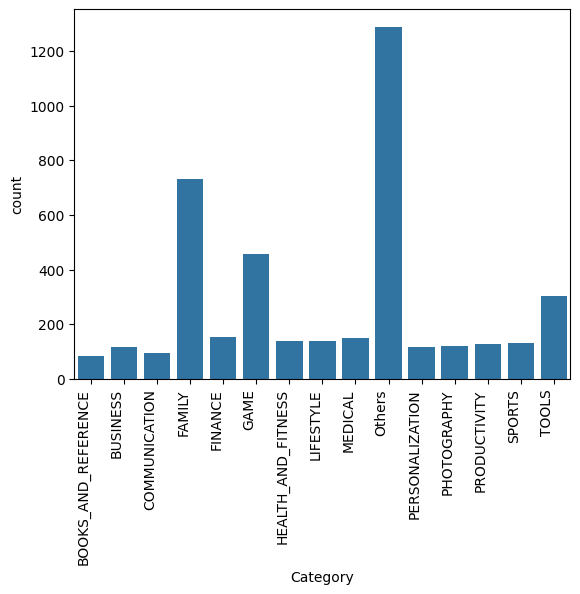

In [85]:
sns.countplot(data=df,x="Category")
plt.xticks(rotation=90,ha="right")
plt.show

- Others has the highest number of count, followed by family, game, and tools
- Every other categories is lower than 200 count|

In [1]:
def uni_continous(data,variable):
    sns.histplot(data=df,x=variable,kde=True)
    plt.xticks(rotation=90,ha="right")
    plt.show()
    sns.boxplot(data=df,x=variable)

def uni_categorical(data, variable):
    sns.countplot(data=df,x=variable)

In [3]:
df.sample()

NameError: name 'df' is not defined

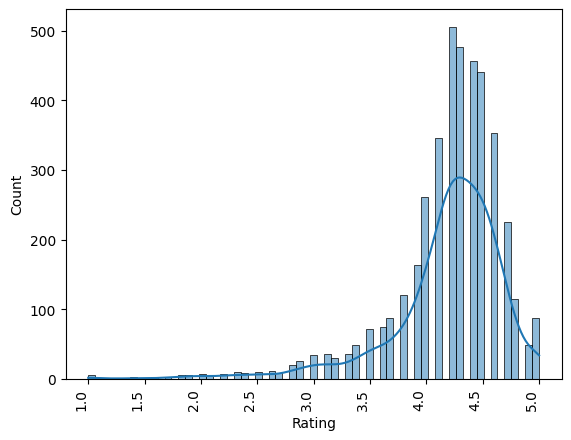

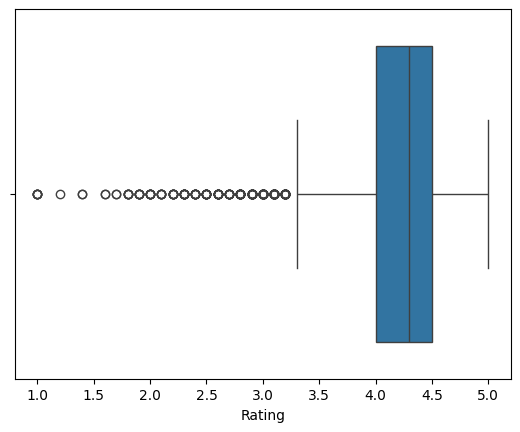

In [66]:
uni_continous(df,"Rating")

- The highest rating falls between 4.0 to 4.5
- The lowest ratings falls below 3.0
- There are outliers in the ratings
- It is negatively skewed

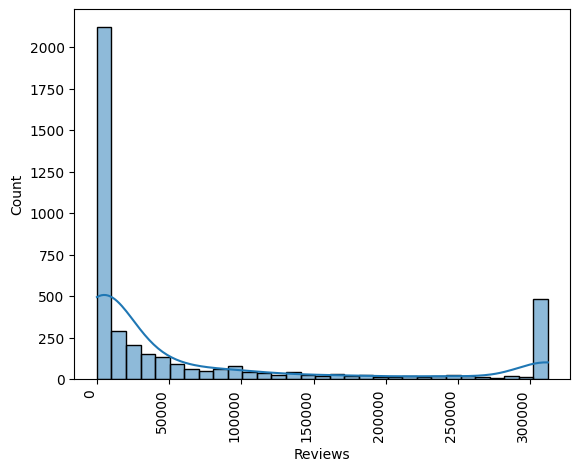

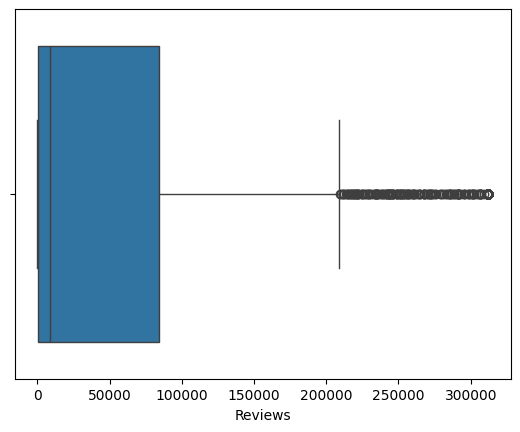

In [88]:
uni_continous(df,"Reviews")

- The reviews is less than 50000
- There are outliers in the reviews
- It is rightly skewed 

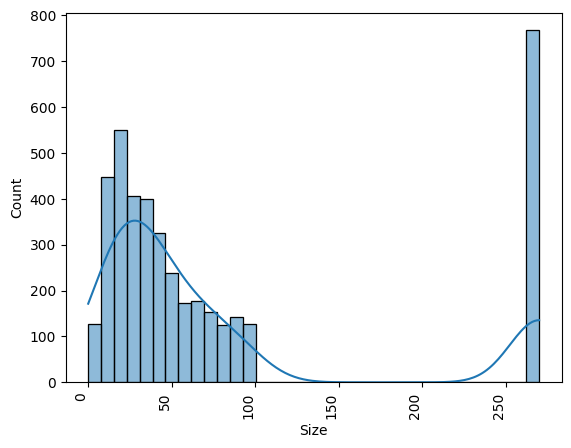

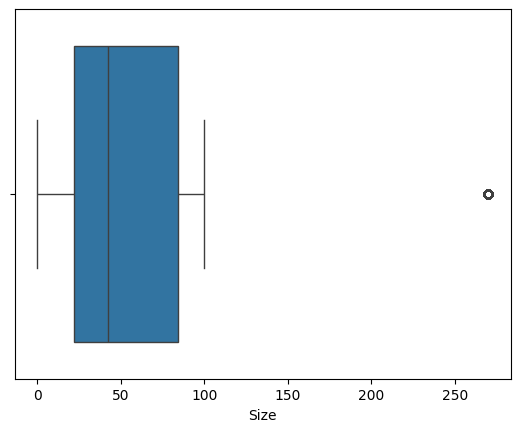

In [69]:
uni_continous(df,"Size")

- It is negatively skewed

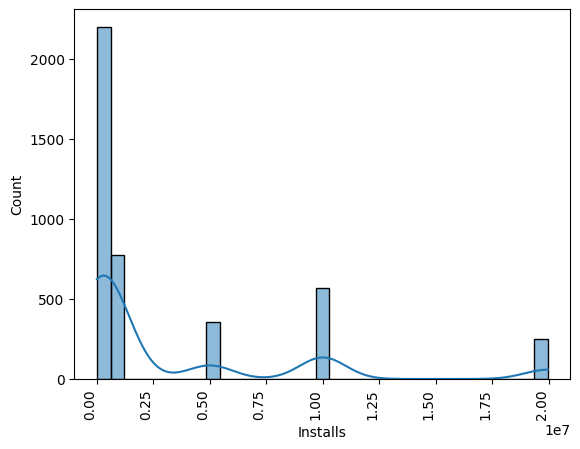

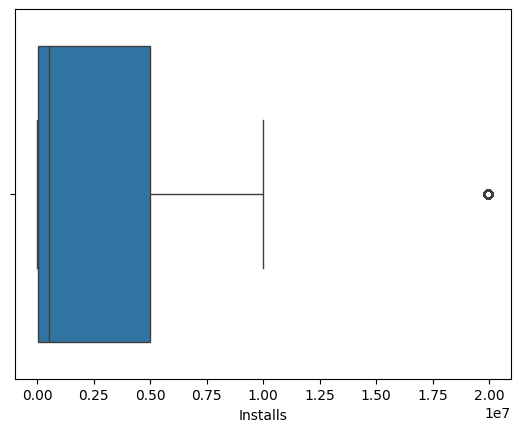

In [70]:
uni_continous(df,"Installs")

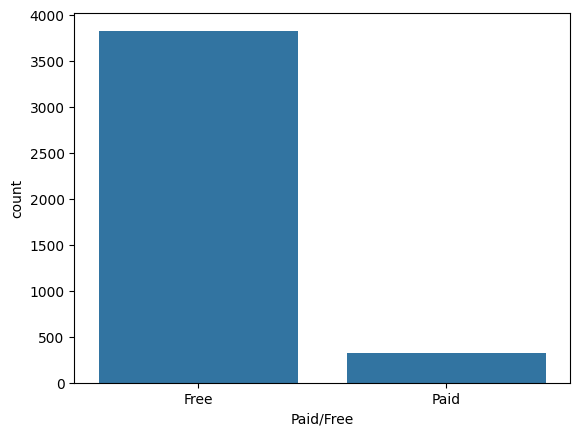

In [73]:
uni_categorical(df,"Paid/Free")

In [74]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
3051,DB Transport,Others,1.9,179.0,10.0,10000,Free,0.0,Everyone,No,No,No


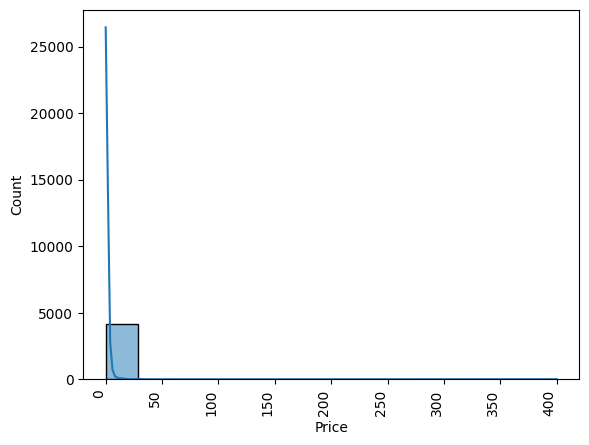

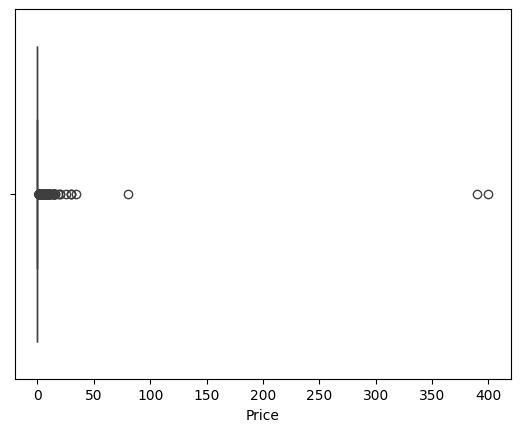

In [75]:
uni_continous(df,"Price")

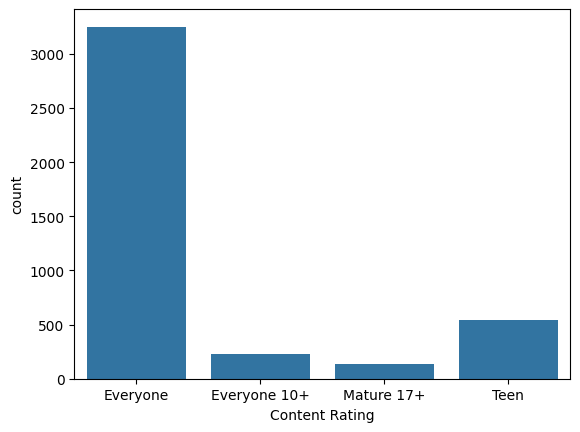

In [77]:
uni_categorical(df,"Content Rating")

In [78]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
1448,Super Ear,MEDICAL,4.1,3498.0,66.0,100000,Free,0.0,Everyone,Yes,No,No


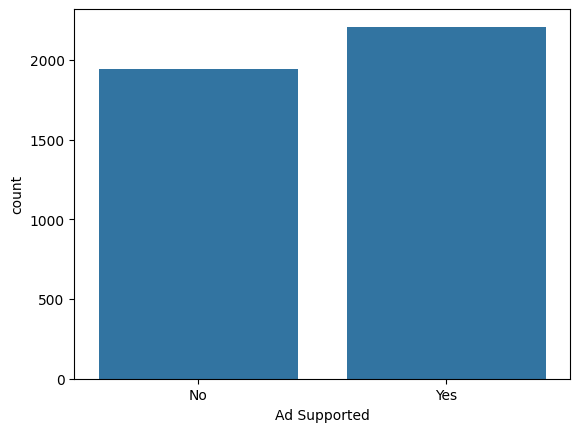

In [79]:
uni_categorical(df,"Ad Supported")

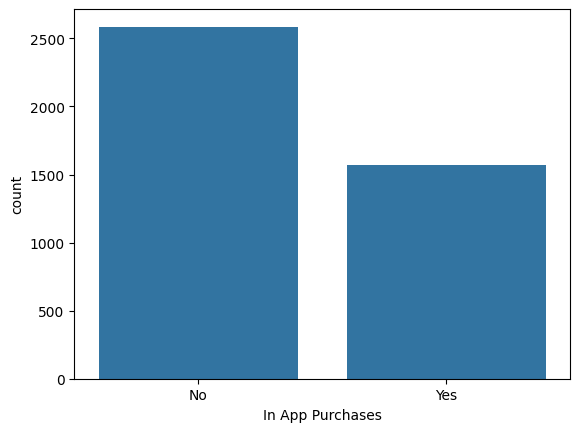

In [80]:
uni_categorical(df,"In App Purchases")

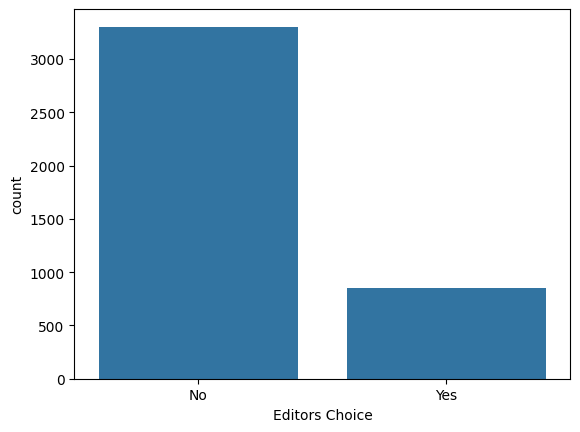

In [82]:
uni_categorical(df,"Editors Choice")